# Extração de Dados - Segurança Pública SP

Este notebook realiza a **extração** de dados do portal de dados abertos da SSP-SP (Secretaria de Segurança Pública de São Paulo).

## Objetivos:
- Fazer download de dados mensais de criminalidade
- Salvar CSVs brutos em `data/raw/`
- Validar os dados extraídos
- Registrar metadados do processo

---

## 1. Importar Bibliotecas e Configurações

In [10]:
# Importar bibliotecas necessárias
import sys
import os
from pathlib import Path
from datetime import datetime
import pandas as pd
import logging

# Adicionar o diretório src ao path para importar os módulos
sys.path.append(str(Path().resolve().parent / 'src'))

# Importar funções de extração
from extract import (
    download_csv_ssp,
    extract_from_portal,
    extract_local_file,
    extract_api_data
)

# Configurar logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 2. Configurar Diretórios e Parâmetros

In [ ]:
# Definir diretórios do projeto
PROJECT_ROOT = Path().resolve().parent
DATA_RAW_DIR = PROJECT_ROOT / 'data' / 'raw'
DATA_INTERIM_DIR = PROJECT_ROOT / 'data' / 'interim'

# Criar diretórios se não existirem
DATA_RAW_DIR.mkdir(parents=True, exist_ok=True)
DATA_INTERIM_DIR.mkdir(parents=True, exist_ok=True)

# Parâmetros de extração
CURRENT_YEAR = 2024
START_MONTH = 1
END_MONTH = 12  # Ajustar conforme necessário

print(f"Diretório de dados brutos: {DATA_RAW_DIR}")
print(f"Diretório de dados intermediários: {DATA_INTERIM_DIR}")
print(f"Período de extração: {START_MONTH}/{CURRENT_YEAR} a {END_MONTH}/{CURRENT_YEAR}")

Diretório de dados brutos: C:\Users\jodes\OneDrive\Documentos\Projetos-GitHub\public-security-data\data\raw
Diretório de dados intermediários: C:\Users\jodes\OneDrive\Documentos\Projetos-GitHub\public-security-data\data\interim
Período de extração: 1/2024 a 10/2024


## 3. Opção 1: Extração via Portal SSP-SP

**Importante:** A URL usada é um exemplo. Você precisará:
1. Acessar o [Portal de Dados Abertos da SSP-SP](https://www.ssp.sp.gov.br/transparenciassp/)
2. Verificar a URL real dos arquivos CSV
3. Ajustar o padrão da URL na função `extract_from_portal`

In [ ]:
# Função para extrair múltiplos meses
def extract_multiple_months(year, start_month, end_month):
    """
    Extrai dados de múltiplos meses do portal SSP-SP
    """
    extracted_data = []
    failed_extractions = []
    
    for month in range(start_month, end_month + 1):
        logger.info(f"Extraindo dados de {month:02d}/{year}...")
        
        try:
            df = extract_from_portal(year, month, str(DATA_RAW_DIR))
            
            if df is not None:
                extracted_data.append({
                    'year': year,
                    'month': month,
                    'records': len(df),
                    'columns': list(df.columns)
                })
                logger.info(f"{len(df)} registros extraídos de {month:02d}/{year}")
            else:
                failed_extractions.append(f"{month:02d}/{year}")
                logger.warning(f"Falha ao extrair {month:02d}/{year}")
                
        except Exception as e:
            failed_extractions.append(f"{month:02d}/{year}")
            logger.error(f"Erro ao extrair {month:02d}/{year}: {e}")
    
    return extracted_data, failed_extractions

# Executar extração 
extracted_data, failed = extract_multiple_months(CURRENT_YEAR, START_MONTH, END_MONTH)

INFO:__main__:Extraindo dados de 01/2024...
ERROR:extract:Erro ao baixar https://www.ssp.sp.gov.br/estatistica/dados/2024/01/dados.csv: 404 Client Error: Not Found for url: https://www.ssp.sp.gov.br/estatistica/dados/2024/01/dados.csv
INFO:__main__:Extraindo dados de 02/2024...
ERROR:extract:Erro ao baixar https://www.ssp.sp.gov.br/estatistica/dados/2024/01/dados.csv: 404 Client Error: Not Found for url: https://www.ssp.sp.gov.br/estatistica/dados/2024/01/dados.csv
INFO:__main__:Extraindo dados de 02/2024...
ERROR:extract:Erro ao baixar https://www.ssp.sp.gov.br/estatistica/dados/2024/02/dados.csv: 404 Client Error: Not Found for url: https://www.ssp.sp.gov.br/estatistica/dados/2024/02/dados.csv
INFO:__main__:Extraindo dados de 03/2024...
ERROR:extract:Erro ao baixar https://www.ssp.sp.gov.br/estatistica/dados/2024/02/dados.csv: 404 Client Error: Not Found for url: https://www.ssp.sp.gov.br/estatistica/dados/2024/02/dados.csv
INFO:__main__:Extraindo dados de 03/2024...
ERROR:extract:Er

: 

## 4. Opção 2: Extração de Arquivo Local

Se você já possui arquivos baixados manualmente do portal da SSP-SP:

In [13]:
# Exemplo: Extrair de arquivo local CSV
# Ajuste o caminho para o seu arquivo

# exemplo_arquivo = DATA_RAW_DIR / "DadosCriminais_2024.csv"

# Se o arquivo existir, extrair
# if exemplo_arquivo.exists():
#     df_local = extract_local_file(
#         str(exemplo_arquivo),
#         encoding='latin1',
#         sep=';'
#     )
#     if df_local is not None:
#         print(f"✅ Arquivo carregado com sucesso!")
#         print(f"📊 Dimensões: {df_local.shape}")
#         print(f"📋 Primeiras linhas:")
#         display(df_local.head())
# else:
#     print(f"⚠️ Arquivo não encontrado: {exemplo_arquivo}")

# Listar arquivos já existentes em data/raw
raw_files = list(DATA_RAW_DIR.glob('*.csv'))
print(f"\nArquivos CSV em data/raw/: {len(raw_files)}")
for file in raw_files:
    print(f"  - {file.name}")


Arquivos CSV em data/raw/: 1
  - exemplo_dados_ssp_2024.csv


## 5. Exemplo de Extração com Dados de Demonstração

Vamos criar um dataset de exemplo para demonstrar o pipeline:

In [14]:
# Criar dataset de exemplo simulando dados da SSP-SP
import numpy as np

# Gerar dados sintéticos para demonstração
np.random.seed(42)

# Municípios de exemplo
municipios = ['São Paulo', 'Campinas', 'Santos', 'Guarulhos', 'Ribeirão Preto']

# Tipos de crime
tipos_crime = ['Furto', 'Roubo', 'Homicídio', 'Lesão Corporal', 'Latrocínio', 'Estupro']

# Gerar dados
dados_exemplo = []
for mes in range(1, 13):  # 13 meses
    for municipio in municipios:
        for tipo_crime in tipos_crime:
            dados_exemplo.append({
                'ANO': CURRENT_YEAR,
                'MES': mes,
                'MUNICIPIO': municipio,
                'TIPO_CRIME': tipo_crime,
                'OCORRENCIAS': np.random.randint(10, 500),
                'VITIMAS': np.random.randint(5, 300),
                'LATITUDE': -23.5 + np.random.uniform(-1, 1),
                'LONGITUDE': -46.6 + np.random.uniform(-1, 1)
            })

df_exemplo = pd.DataFrame(dados_exemplo)

# Salvar arquivo de exemplo
exemplo_path = DATA_RAW_DIR / f"exemplo_dados_ssp_{CURRENT_YEAR}.csv"
df_exemplo.to_csv(exemplo_path, index=False, encoding='utf-8-sig', sep=';')

print(f"Dataset de exemplo criado!")
print(f"Dimensões: {df_exemplo.shape}")
print(f"Salvo em: {exemplo_path}")
print(f"\nPrimeiras linhas:")
df_exemplo.head(10)

Dataset de exemplo criado!
Dimensões: (360, 8)
Salvo em: C:\Users\jodes\OneDrive\Documentos\Projetos-GitHub\public-security-data\data\raw\exemplo_dados_ssp_2024.csv

Primeiras linhas:


,ANO,MES,MUNICIPIO,TIPO_CRIME,OCORRENCIAS,VITIMAS,LATITUDE,LONGITUDE
0,2024,1,São Paulo,Furto,112,275,-23.036012,-46.402683
1,2024,1,São Paulo,Roubo,112,126,-24.188011,-47.483833
2,2024,1,São Paulo,Homicídio,97,104,-24.214266,-46.298223
3,2024,1,São Paulo,Lesão Corporal,318,262,-23.056002,-45.722895
4,2024,1,São Paulo,Latrocínio,395,196,-22.515577,-46.365037
5,2024,1,São Paulo,Estupro,323,26,-24.485867,-47.553875
6,2024,1,Campinas,Furto,484,63,-23.700278,-47.506669
7,2024,1,Campinas,Roubo,197,275,-23.587860,-46.029648
8,2024,1,Campinas,Homicídio,60,59,-22.533538,-46.666474
9,2024,1,Campinas,Lesão Corporal,494,139,-24.158952,-47.469897


## 6. Validação dos Dados Extraídos

In [15]:
# Validar os dados extraídos
print("=" * 60)
print("VALIDAÇÃO DOS DADOS EXTRAÍDOS")
print("=" * 60)

# 1. Informações gerais
print(f"\nInformações Gerais:")
print(f"   - Total de registros: {len(df_exemplo):,}")
print(f"   - Total de colunas: {len(df_exemplo.columns)}")
print(f"   - Período: {df_exemplo['MES'].min()}/{df_exemplo['ANO'].min()} a {df_exemplo['MES'].max()}/{df_exemplo['ANO'].max()}")

# 2. Estrutura dos dados
print(f"\nEstrutura dos Dados:")
print(df_exemplo.dtypes)

# 3. Valores ausentes
print(f"\nValores Ausentes:")
valores_nulos = df_exemplo.isnull().sum()
if valores_nulos.sum() == 0:
    print("   ✅ Nenhum valor ausente encontrado!")
else:
    print(valores_nulos[valores_nulos > 0])

# 4. Estatísticas descritivas
print(f"\nEstatísticas Descritivas:")
print(df_exemplo[['OCORRENCIAS', 'VITIMAS']].describe())

# 5. Distribuição por tipo de crime
print(f"\nDistribuição por Tipo de Crime:")
distribuicao_crimes = df_exemplo.groupby('TIPO_CRIME')['OCORRENCIAS'].sum().sort_values(ascending=False)
print(distribuicao_crimes)

# 6. Municípios únicos
print(f"\nMunicípios Únicos: {df_exemplo['MUNICIPIO'].nunique()}")
print(df_exemplo['MUNICIPIO'].unique())

VALIDAÇÃO DOS DADOS EXTRAÍDOS

Informações Gerais:
   - Total de registros: 360
   - Total de colunas: 8
   - Período: 1/2024 a 12/2024

Estrutura dos Dados:
ANO              int64
MES              int64
MUNICIPIO       object
TIPO_CRIME      object
OCORRENCIAS      int64
VITIMAS          int64
LATITUDE       float64
LONGITUDE      float64
dtype: object

Valores Ausentes:
   ✅ Nenhum valor ausente encontrado!

Estatísticas Descritivas:
       OCORRENCIAS     VITIMAS
count   360.000000  360.000000
mean    259.611111  150.727778
std     144.611780   86.363572
min      10.000000    5.000000
25%     130.250000   71.750000
50%     265.000000  150.000000
75%     379.250000  224.500000
max     499.000000  299.000000

Distribuição por Tipo de Crime:
TIPO_CRIME
Lesão Corporal    17537
Latrocínio        16406
Estupro           15842
Furto             15819
Roubo             14560
Homicídio         13296
Name: OCORRENCIAS, dtype: int64

Municípios Únicos: 5
['São Paulo' 'Campinas' 'Santos' 'Guaru

## 7. Visualização Inicial dos Dados

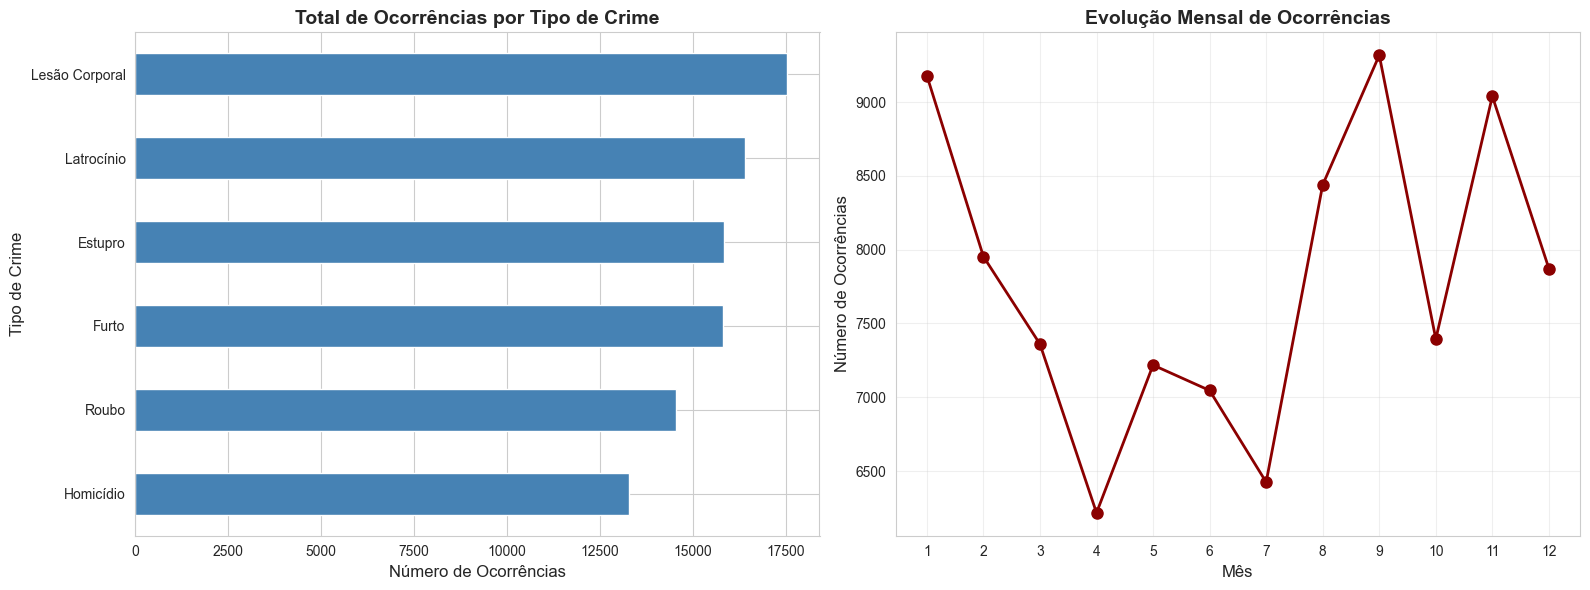

Visualizações criadas com sucesso!


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# Criar visualizações
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Total de Ocorrências por Tipo de Crime
crime_totals = df_exemplo.groupby('TIPO_CRIME')['OCORRENCIAS'].sum().sort_values(ascending=True)
crime_totals.plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Total de Ocorrências por Tipo de Crime', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Número de Ocorrências', fontsize=12)
axes[0].set_ylabel('Tipo de Crime', fontsize=12)

# Gráfico 2: Evolução Mensal de Ocorrências
monthly_crimes = df_exemplo.groupby('MES')['OCORRENCIAS'].sum()
axes[1].plot(monthly_crimes.index, monthly_crimes.values, marker='o', linewidth=2, markersize=8, color='darkred')
axes[1].set_title('Evolução Mensal de Ocorrências', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Mês', fontsize=12)
axes[1].set_ylabel('Número de Ocorrências', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, 13))

plt.tight_layout()
plt.show()

print("Visualizações criadas com sucesso!")

## 8. Salvar Metadados da Extração

In [17]:
import json

# Criar metadados da extração
metadata = {
    'data_extracao': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'fonte': 'Portal SSP-SP (Dados de Exemplo)',
    'periodo': {
        'ano': int(CURRENT_YEAR),
        'mes_inicio': int(START_MONTH),
        'mes_fim': int(END_MONTH)
    },
    'dados': {
        'total_registros': int(len(df_exemplo)),
        'total_colunas': int(len(df_exemplo.columns)),
        'colunas': list(df_exemplo.columns),
        'municipios': list(df_exemplo['MUNICIPIO'].unique()),
        'tipos_crime': list(df_exemplo['TIPO_CRIME'].unique())
    },
    'qualidade': {
        'valores_nulos': int(df_exemplo.isnull().sum().sum()),
        'duplicatas': int(df_exemplo.duplicated().sum())
    },
    'estatisticas': {
        'total_ocorrencias': int(df_exemplo['OCORRENCIAS'].sum()),
        'total_vitimas': int(df_exemplo['VITIMAS'].sum()),
        'media_ocorrencias_mes': float(df_exemplo.groupby('MES')['OCORRENCIAS'].sum().mean())
    }
}

# Salvar metadados
metadata_path = DATA_RAW_DIR / 'metadata_extracao.json'
with open(metadata_path, 'w', encoding='utf-8') as f:
    json.dump(metadata, f, indent=2, ensure_ascii=False)

print(f"Metadados salvos em: {metadata_path}")
print(f"\nResumo da Extração:")
print(json.dumps(metadata, indent=2, ensure_ascii=False))

Metadados salvos em: C:\Users\jodes\OneDrive\Documentos\Projetos-GitHub\public-security-data\data\raw\metadata_extracao.json

Resumo da Extração:
{
  "data_extracao": "2025-11-03 15:08:37",
  "fonte": "Portal SSP-SP (Dados de Exemplo)",
  "periodo": {
    "ano": 2024,
    "mes_inicio": 1,
    "mes_fim": 10
  },
  "dados": {
    "total_registros": 360,
    "total_colunas": 8,
    "colunas": [
      "ANO",
      "MES",
      "MUNICIPIO",
      "TIPO_CRIME",
      "OCORRENCIAS",
      "VITIMAS",
      "LATITUDE",
      "LONGITUDE"
    ],
    "municipios": [
      "São Paulo",
      "Campinas",
      "Santos",
      "Guarulhos",
      "Ribeirão Preto"
    ],
    "tipos_crime": [
      "Furto",
      "Roubo",
      "Homicídio",
      "Lesão Corporal",
      "Latrocínio",
      "Estupro"
    ]
  },
  "qualidade": {
    "valores_nulos": 0,
    "duplicatas": 0
  },
  "estatisticas": {
    "total_ocorrencias": 93460,
    "total_vitimas": 54262,
    "media_ocorrencias_mes": 7788.333333333333
  }

## 9. Resumo e Próximos Passos

### ✅ Resumo da Extração

Neste notebook, realizamos:
1. ✅ Configuração do ambiente e importação de bibliotecas
2. ✅ Definição de diretórios e parâmetros
3. ✅ Preparação de funções para extração de dados (portal e arquivos locais)
4. ✅ Criação de dataset de exemplo
5. ✅ Validação dos dados extraídos
6. ✅ Visualização inicial dos dados
7. ✅ Salvamento de metadados

### 📝 Próximos Passos

1. **Ajustar URLs reais**: Verificar as URLs corretas do portal da SSP-SP
2. **Executar extração real**: Descomentar as funções de extração para baixar dados reais
3. **Transformação**: Seguir para o notebook `2_transformacao.ipynb` para limpar e transformar os dados
4. **Carga**: Usar o notebook `3_carga.ipynb` para salvar os dados processados
5. **Análise**: Realizar análises exploratórias no notebook `4_analise_dados.ipynb`

### 🔗 Links Úteis

- [Portal de Dados Abertos SSP-SP](https://www.ssp.sp.gov.br/transparenciassp/)
- [Estatísticas Criminais](https://www.ssp.sp.gov.br/estatistica/)

In [18]:
# Verificar arquivos criados
print("Arquivos criados durante a extração:")
print(f"\nDiretório: {DATA_RAW_DIR}")
print("-" * 60)

for file in sorted(DATA_RAW_DIR.glob('*')):
    size_kb = file.stat().st_size / 1024
    print(f"  📄 {file.name:<40} ({size_kb:,.2f} KB)")

print("\n" + "="*60)
print("EXTRAÇÃO CONCLUÍDA COM SUCESSO!")
print("="*60)
print("\nPróximo passo: Execute o notebook '2_transformacao.ipynb'")

Arquivos criados durante a extração:

Diretório: C:\Users\jodes\OneDrive\Documentos\Projetos-GitHub\public-security-data\data\raw
------------------------------------------------------------
  📄 exemplo_dados_ssp_2024.csv               (26.45 KB)
  📄 metadata_extracao.json                   (0.89 KB)

EXTRAÇÃO CONCLUÍDA COM SUCESSO!

Próximo passo: Execute o notebook '2_transformacao.ipynb'
